# 2.2 Кластеризация. Баннеры.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [ODS: Обучение без учителя: PCA и кластеризация](https://habrahabr.ru/company/ods/blog/325654/)
- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

## Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 элементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет используя pandas `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift

In [2]:
df = pd.read_csv("../../data/checkins.csv.gz",compression='gzip')

In [3]:
df.shape

(100000, 2)

In [4]:
df.head()

,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


In [5]:
df.describe()

,latitude,longitude
count,100000.000000,100000.000000
mean,36.886388,-89.396849
std,8.351517,35.579317
min,-45.031162,-159.670833
25%,33.494170,-112.074037
50%,38.646991,-87.743938
75%,40.740389,-75.163789
max,67.631479,174.908056


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [47]:
ms = MeanShift(bandwidth=0.1,n_jobs=None)

In [49]:
%%time
ms.fit(df)

CPU times: user 4min 16s, sys: 154 ms, total: 4min 17s
Wall time: 4min 17s


MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

??? При n_jobs > 1, значительно увеличивается Wall time. Т.е. нагрузка на цп уже спала, но результат рассчетов еще не выдается, в отличии от 1 потока. Почему так?

CPU times: user 2.52 s, sys: 742 ms, total: 3.26 s
Wall time: 36.9 s

In [50]:
cluster_centers = ms.cluster_centers_
labels = ms.labels_

In [51]:
print('clusters: {}'.format(len(cluster_centers)))

clusters: 3319


### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#Добавлю координаты офисов в массив
offices = np.array([[33.751277, -118.188740],
           [25.867736, -80.324116], 
           [51.503016, -0.075479],
           [52.378894, 4.885084],
           [39.366487, 117.036146],
           [-33.868457, 151.20513]])

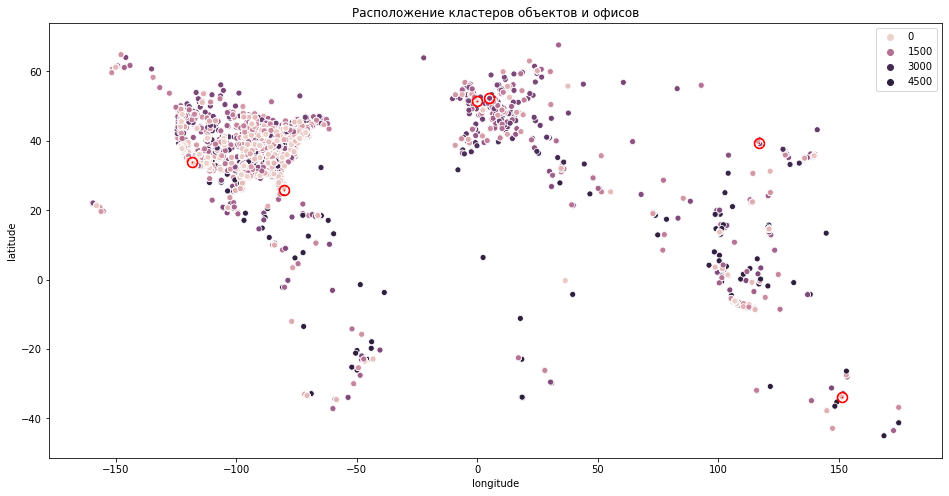

In [54]:
plt.figure(figsize=(16,8)) 
plt.scatter(x=offices[:,1],y=offices[:,0], marker = ".",color = 'r', s = 10, linewidths = 10, zorder = 10)
sns.scatterplot(data = df, x='longitude', y='latitude', hue=labels)

#Добавить центры кластеров
#plt.scatter(cluster_centers[:,1],cluster_centers[:,0],marker = ".",color = 'g', s = 10, linewidths = 2, zorder = 10)
plt.title('Расположение кластеров объектов и офисов')
plt.show()

###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

Инфо [itertools](https://all-python.ru/osnovy/itertools.html)

In [55]:
#! Разобраться с itertools.groupby

In [56]:
from itertools import groupby

2 вариант:

In [131]:
df['cluster'] = labels

In [211]:
df_gt15 = df.groupby('cluster').filter(lambda x: len(x)>15)

In [212]:
df_gt15.groupby('cluster')['cluster'].unique().count()

595

In [60]:
df_gt15.shape

(90615, 3)

In [61]:
df.shape

(100000, 3)

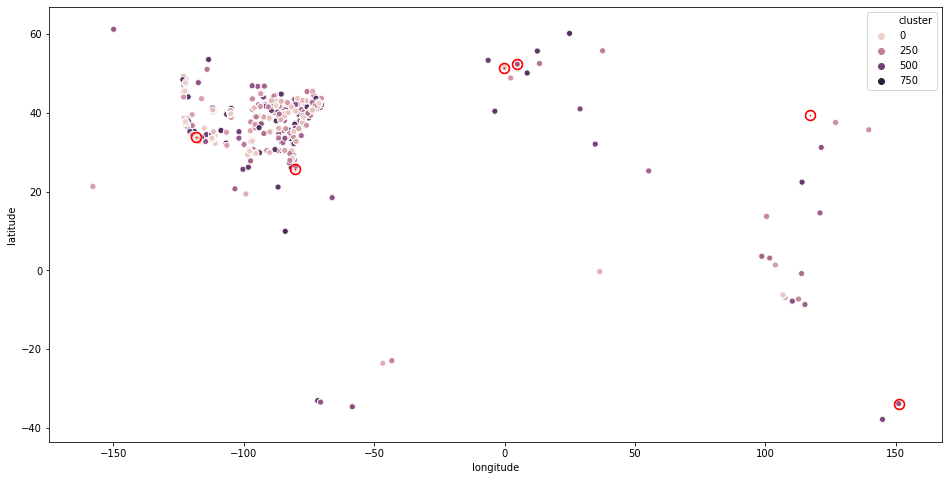

In [62]:
plt.figure(figsize=(16,8)) 
#Добавить офисы
plt.scatter(x=offices[:,1],y=offices[:,0], marker = ".",color = 'r', s = 10, linewidths = 10, zorder = 10)
#Добавить точки
sns.scatterplot(data = df_gt15, y='latitude',x='longitude', hue='cluster')

#Добавить центры кластеров
#for l in df_gt15['lcluster'].unique():
#    plt.scatter(cluster_centers[l-1:l,1],cluster_centers[l-1:l,0],marker = ".",color = 'g', s = 10, linewidths = 1, zorder = 10)
plt.show()

###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

Сделаю датафрейм с уникальными кластерами в которых более 15 объектов, добавлю координаты кластеров

In [340]:
df_gt15_с = pd.DataFrame(df_gt15['cluster'].unique(),columns=['cluster'])

Добавлю еще количество объектов в кластере, чтобы смотреть наиболее привлекательные кластеры из тех, которые имеют одинаковое расстояние до офиса

In [341]:
df_count_in_clus = df.groupby('cluster')['latitude'].count().rename('count').reset_index()

In [342]:
def GetCountInCluster(cluster,df):
    return int(df[df['cluster']==cluster]['count'])   

In [343]:
df_gt15_с['count_in_cluster'] = df_gt15_с['cluster'].apply(lambda c: GetCountInCluster(c,df_count_in_clus))

In [344]:
df_gt15_с['cc_latitude'] = df_gt15_с['cluster'].apply(lambda c: cluster_centers[c][0])

In [345]:
df_gt15_с['cc_longitude'] = df_gt15_с['cluster'].apply(lambda c: cluster_centers[c][1])

In [346]:
def Euclid (x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5

In [347]:
#Считаю евклидово расстояние от офисов до всех координат и записываю в df_15 в новые столцы
offices_name = ['Los Angeles','Miami','London','Amsterdam','Beijing','Sydney']
for i in range(6):                                                        
    #Расстояние от офиса до центора кластера
    df_gt15_с['cc_to_{}'.format(offices_name[i])] = Euclid(offices[i][0],df_gt15_с['cc_latitude'],\
                                                         offices[i][1],df_gt15_с['cc_longitude'])

In [352]:
df_gt15_с.sort_values(by=['cc_to_London']).head(30)

,cluster,count_in_cluster,cc_latitude,cc_longitude,cc_to_Los Angeles,cc_to_Miami,cc_to_London,cc_to_Amsterdam,cc_to_Beijing,cc_to_Sydney
561,472,23,32.059502,34.788657,151.964526,106.226916,51.650648,47.572159,77.717593,185.093708
254,463,23,41.005270,28.976960,152.415383,106.870902,52.962453,48.993288,78.595523,185.464047
482,258,44,55.748350,37.623850,153.017209,107.727466,54.670272,50.834629,79.756338,185.958947
134,243,47,-22.903539,-43.209587,153.290914,108.115887,55.431730,51.652663,80.280206,186.184232
168,102,116,-23.548943,-46.638818,153.684453,108.673142,56.510915,52.809131,81.029120,186.508378
93,433,26,-34.611996,-58.371865,153.786541,108.817466,56.787961,53.105493,81.222579,186.592508
410,345,33,25.264444,55.311667,154.882550,110.360976,59.692351,56.200512,83.279118,187.496848
372,569,16,60.169954,24.937730,155.971402,111.883953,62.463195,59.135197,85.287077,188.397299
335,99,120,-0.301226,36.522964,156.338702,112.395420,63.374775,60.097279,85.956948,188.701493
390,416,27,-33.425741,-70.570740,156.414576,112.500935,63.561719,60.294386,86.094871,188.764360


Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)` если считаете через geopy, либо `(-33.86063043, 151.20477593)` если считаете с евклидовой метрикой. Если у вас не так, то считайте, что вы сделали что-то неправильно. 